In [1]:
import pandas as pd
import matplotlib.pyplot as plt
ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie')
ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1


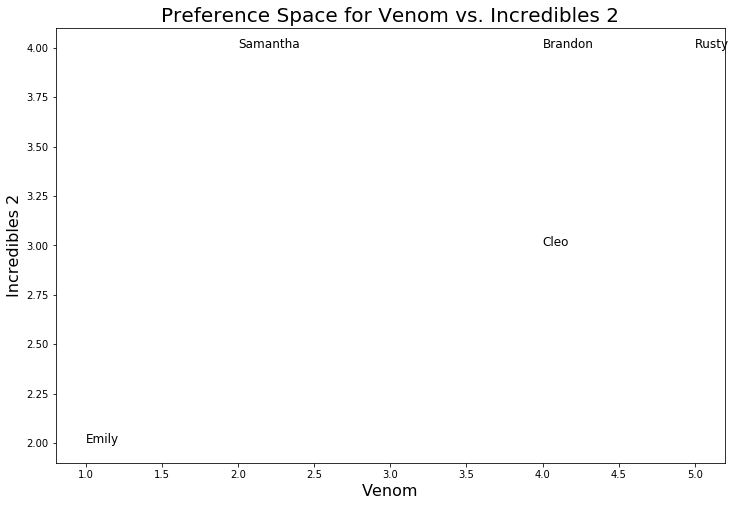

In [2]:
# Create a scatter plot from 2 movie titles
def ratings_scatter(movie1, movie2):
    x = ratings.T[movie1]
    y = ratings.T[movie2]
    n = list(ratings.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)
        
ratings_scatter('Venom', 'Incredibles 2')

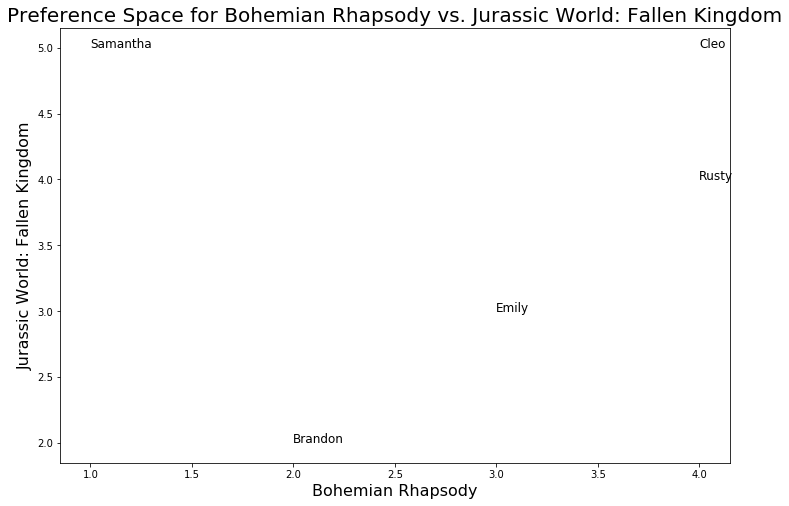

In [3]:
ratings_scatter('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [4]:
from scipy.spatial.distance import pdist, squareform

## Aggregate distance between preference spaces, by using squareform and pdist from the Scipy library 
## to create a matrix containing the Euclidean distances between all our users
squareform(pdist(ratings.T, 'euclidean'))

distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [5]:
# Template for a new user
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible – Fallout': 3,
 'Venom': 3}

In [6]:
# Factor Tom into our similarity matrix and then determine which other users are most similar to him
ratings['Tom'] = pd.Series(tom)

distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]
similarities

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [7]:
new_ratings = pd.read_csv('./data/movie_ratings2.csv').set_index('Movie') #new data
new_ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5


In [8]:
recommendations = new_ratings.copy()

# Iterate through each of the other users' similarity scores with Tom 
for name, score in dict(similarities).items():
    # ... and weight their recommendations of these new movies by their similarity score
    recommendations[name] = recommendations[name] * score

# Create a new Total column that sums up the total scores for each movie
recommendations['Total'] = recommendations.sum(axis=1)
# ...and sort on that so that the movies are in the order that they should be recommended to Tom
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [9]:
# Euclidean is just one of serveral distance metrics that we can use
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [10]:
# Swap out Euclidean for Cosine distance metric in first line of code
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cosine'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,3.615951,2.511274,3.809728,2.532334,3.168375,15.637662
Despicable Me 3,3.615951,4.185457,4.762161,0.844111,1.584187,14.991867
Thor: Ragnarok,3.615951,2.511274,3.809728,0.844111,3.960468,14.741533
Wolf Warrior 2,4.519939,2.511274,1.904864,2.532334,3.168375,14.636786
Jumanji: Welcome to the Jungle,3.615951,2.511274,2.857296,1.688222,3.960468,14.633212
Guardians of the Galaxy Vol. 2,3.615951,0.837091,4.762161,3.376445,1.584187,14.175835
Spider-Man: Homecoming,0.903988,2.511274,4.762161,1.688222,3.960468,13.826113
Beauty and the Beast,1.807976,4.185457,1.904864,4.220556,1.584187,13.703040
Star Wars: The Last Jedi,4.519939,3.348365,0.952432,1.688222,1.584187,12.093146


In [11]:
# Swap out Euclidean for "Cityblock" distance metric in first line of code
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'cityblock'))), 
                         index=ratings.columns, columns=ratings.columns)

similarities = distances['Tom'].sort_values(ascending=False)[1:]

recommendations = new_ratings.copy()

for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score
    
recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,0.2500,0.166667,0.4,0.176471,0.20,1.193137
Despicable Me 3,0.2500,0.277778,0.5,0.058824,0.10,1.186601
Guardians of the Galaxy Vol. 2,0.2500,0.055556,0.5,0.235294,0.10,1.140850
Thor: Ragnarok,0.2500,0.166667,0.4,0.058824,0.25,1.125490
Spider-Man: Homecoming,0.0625,0.166667,0.5,0.117647,0.25,1.096814
Jumanji: Welcome to the Jungle,0.2500,0.166667,0.3,0.117647,0.25,1.084314
Wolf Warrior 2,0.3125,0.166667,0.2,0.176471,0.20,1.055637
Beauty and the Beast,0.1250,0.277778,0.2,0.294118,0.10,0.996895
Star Wars: The Last Jedi,0.3125,0.222222,0.1,0.117647,0.10,0.852369
